In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets



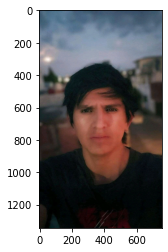

In [7]:
img = matim.imread('./images/me.jpeg')
plt.imshow(img)


In [9]:
@widgets.interact_manual( s = (0, 200, 1), r = ( 0, 1, 0.1 ) )
def edgePreserve( s = 50, r = 0.5 ):
    edgeImg = cv2.edgePreservingFilter(img, sigma_s = s, sigma_r = r)
    #display output
    plt.figure( figsize = ( 15, 8 ) )
    plt.subplot( 1, 2, 1 ) #original image
    plt.imshow( img )
    plt.subplot( 1, 2, 2 ) #filtered image
    plt.imshow(edgeImg)
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [10]:
print('Detail Enhance')

Detail Enhance


In [13]:
@widgets.interact( s = (0, 200, 1 ), r = ( 0, 1, 0.1 ) )
def detail( s = 20, r = 0.2  ):
    detailImg = cv2.detailEnhance( img, sigma_s = s, sigma_r = r )
    #display output
    plt.figure( figsize = ( 15, 8 ) )
    plt.subplot( 1, 2, 1 ) # original image
    plt.imshow(img)
    plt.yticks( [] ), plt.xticks( [] )
    plt.title( 'Original image' )
    plt.subplot( 1, 2, 2 ) #filtered image
    plt.imshow(detailImg)
    plt.title('Detail Enhance')
    plt.yticks( [] ),plt.xticks( [] )
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=200), FloatSlider(value=0.2, description='r', m…

In [29]:
def adjust_gamma( image, gamma = 1 ):
    invGamma = 1.0 / gamma
    table = np.array( [(( i / 255 )**invGamma )*255 for i in np.arange(0, 256) ] ) #lookup table
    lut_img = cv2.LUT( image.astype( np.uint8), table.astype(np.uint8) )
    return lut_img
    

In [30]:
path = './images/me.jpeg'
img = matim.imread(path)

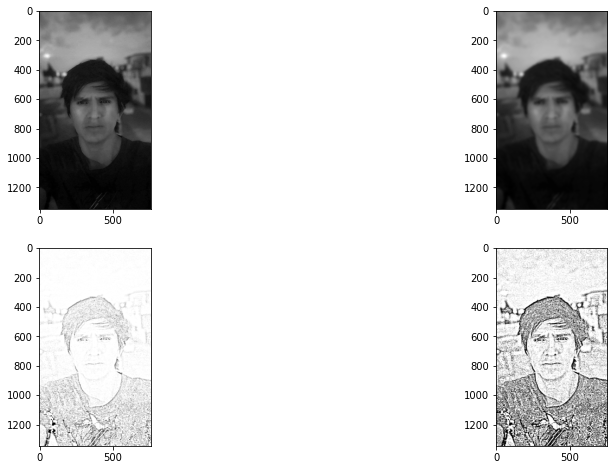

In [33]:
#pencil sketch
ksize = 21
sigmaX = 9
gamma = 0.1
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur( gray, (ksize, ksize), sigmaX ) # ksize = 3 to 25 and sigmax = 1 to 15
gray_blur_divide = cv2.divide( gray, gray_blur, scale = 256 )
pencil_sktech = adjust_gamma( gray_blur_divide , gamma = gamma ) # 0 - 1

#display output
plt.figure( figsize = ( 15, 8 ) )
plt.subplot( 2, 2, 1 )
plt.imshow( gray, cmap = 'gray' )
plt.subplot( 2, 2, 2 )
plt.imshow( gray_blur, cmap = 'gray' )
plt.subplot( 2, 2, 3 )
plt.imshow( gray_blur_divide , cmap = 'gray' )
plt.subplot( 2, 2, 4 )
plt.imshow( pencil_sktech , cmap = 'gray' )

In [36]:
@widgets.interact_manual(ksize = (3, 25, 2 ), sigmaX = (1, 15, 2), gamma = (0, 1, 0.01) )
def pencil_art_image( ksize = 21, sigmaX = 9, gamma = 0.1  ):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur( gray, (ksize, ksize), sigmaX ) # ksize = 3 to 25 and sigmax = 1 to 15
    gray_blur_divide = cv2.divide( gray, gray_blur, scale = 256 )
    pencil_sktech = adjust_gamma( gray_blur_divide , gamma = gamma ) # 0 - 1
    #display the output
    plt.figure( figsize = ( 15, 8 ) )
    plt.subplot( 1, 2, 1 ) # original image
    plt.imshow(img)
    plt.yticks( [] ), plt.xticks( [] )
    plt.title( 'Original image' )
    plt.subplot( 1, 2, 2 ) #filtered image
    plt.imshow(pencil_sktech, cmap = 'gray')
    plt.title('Pencil Sketch')
    plt.yticks( [] ),plt.xticks( [] )
    plt.show()

interactive(children=(IntSlider(value=21, description='ksize', max=25, min=3, step=2), IntSlider(value=9, desc…